# FAQ Scraper API Walk Through

### Setup

This notebook assumes you have portforwarding set up on your local system and user access account has forward kube permissions. To setup portforwarding, clone this repo https://github.com/chatatechnologies/devops to your local system. 

1) Using the terminal, navigate to the local directory containing the cloned devops repo

2) `cd bin`

3) `forward_kube`

4) Select option `4`, cass-staging

A list of all kube services will scroll. Eventually you should see `faq-parser-app avaiable on localhost 8xxx`.
Keep this terminal open while interacting with the API. 

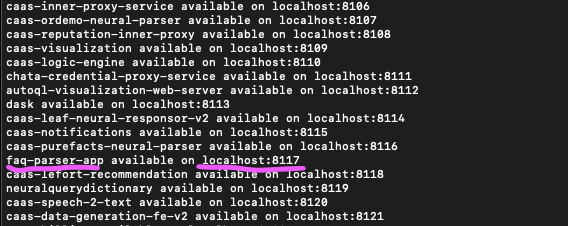

### Test Run

In [1]:
import requests
import json

##### URL to Scrape

In [2]:
url = 'https://chata.ai/autoql/faq/'
port = '8117' # IMPORTANT Replace this number with the 8xxx forwarded port number assigned to faq-parser-app by forward_kube
BASE = f'http://127.0.0.1:{port}/' 

In [3]:
request_data = {'url': url}
response = requests.put(BASE + 'faq_parser', request_data)
print(response.json()) #raw json response

{
    "status": "OK",
    "data": {
        "0": {
            "question": "How can we help?",
            "answer": "FAQs, popular resources, and helpful links to all things AutoQL. Get started here. Frequently Asked Questions We're here to help Top FAQs"
        },
        "1": {
            "question": "1) What is AutoQL?",
            "answer": "Everyone needs access to data to make informed decisions and take strategic action. We believe getting answers and information from a database should (and can) be as simple as having a conversation. So, we built AutoQL to help people access their data in a more intuitive way. AutoQL is an API-first solution that simplifies data access and streamlines analysis by making data accessible to everyone \u2014 even non-technical business users \u2014 through natural language. Leveraging conversational AI technologies and embeddable in any branded or proprietary application, AutoQL is the only self-service data access solution that dynamically tran

In [18]:
response

<Response [404]>

### Saving To GCP Bucket

##### Fabulous 

In [25]:
# Little function to help with readability
import pprint
from colorama import Fore
from colorama import Style

def fabulous(response_json):
    response_json = json.loads(response_json)
    if 'status' in response_json.keys():
        print(f"{Fore.RED}Status: {response_json['status']}{Style.RESET_ALL}", end='\n')
    if 'data' in response_json.keys():
        if response_json['data']:
            for qa in response_json['data']:
                print(f'{Fore.GREEN}[{int(qa)+1}]{Style.RESET_ALL}')
                print(f'{Fore.MAGENTA}Question:{Style.RESET_ALL}')
                pprint.pprint(f'{response_json["data"][qa]["question"]}')
                print(f'{Fore.CYAN}Answer:{Style.RESET_ALL}')
                pprint.pprint(f'{response_json["data"][qa]["answer"]}')
        if 'save_dir' in response_json.keys():
            if response_json['save_dir']:
                print(f"{Fore.RED}Save Location: {response_json['save_dir']}{Style.RESET_ALL}", end='\n')
    else:
        print(f'{Fore.RED}Parser found nothing to parse{Style.RESET_ALL}')

##### Scrape & Save

In [31]:
url = 'https://chata.ai/autoql/faq/'
bucket_dir = 'knowledge/test'


In [32]:
BASE = 'http://127.0.0.1:8116/'
request_data = {'url': url, 'save':True, 'bucket_dir': bucket_dir}
response = requests.put(BASE + 'faq_parser', request_data)
fabulous(response.json())

Status: OK
[1]
Question:
'How can we help?'
Answer:
('FAQs, popular resources, and helpful links to all things AutoQL. Get started '
 "here. Frequently Asked Questions We're here to help Top FAQs")
[2]
Question:
'1) What is AutoQL?'
Answer:
('Everyone needs access to data to make informed decisions and take strategic '
 'action. We believe getting answers and information from a database should '
 '(and can) be as simple as having a conversation. So, we built AutoQL to help '
 'people access their data in a more intuitive way. AutoQL is an API-first '
 'solution that simplifies data access and streamlines analysis by making data '
 'accessible to everyone — even non-technical business users — through natural '
 'language. Leveraging conversational AI technologies and embeddable in any '
 'branded or proprietary application, AutoQL is the only self-service data '
 'access solution that dynamically translates natural language into database '
 'query languages in real time. Users simply as